# Topic 7: Time Series Practical
Singapore Polytechnic School of Computing

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### task 2.1 Creating time series index

In [159]:
pd.date_range('2021-01-01', '2021-12-01', freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01'],
              dtype='datetime64[ns]', length=335, freq='D')

In [160]:
pd.date_range('2021-01-01', '2021-12-01', freq='W')

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21',
               '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
               '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11',
               '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
               '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05',
               '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03',
               '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31',
               '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28'],
              dtype='datetime64[ns]', freq='W-SUN')

In [161]:
pd.date_range('2021-01-01', '2021-12-01', freq='MS')

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq='MS')

### task 2.2 Creating Time series white noise

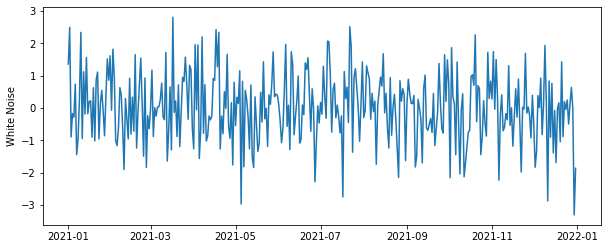

In [162]:
df = pd.DataFrame({'Date': pd.date_range('2021-01-01', '2021-12-31', freq='D'),
                   'Noise': [random.gauss(0, 1) for i in range(365)]})
plt.figure(figsize=(10, 4))         
plt.plot(df['Date'], df['Noise'])
plt.ylabel('White Noise')
plt.show()

### task 2.3 Simulating time series random walk

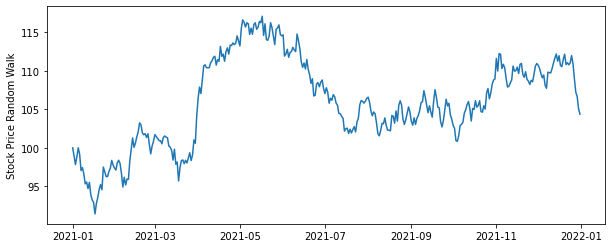

In [163]:
df = pd.DataFrame({'Date': pd.date_range('2021-01-01', '2021-12-31', freq='D'),
                   'Noise': [100]+[random.gauss(0, 1) for i in range(364)]})
df['Stock'] = df['Noise'].cumsum()
plt.figure(figsize=(10, 4))         
plt.plot(df['Date'], df['Stock'])
plt.ylabel('Stock Price Random Walk')
plt.show()

### task 2.4 Summarizing time series data

In [164]:
df = pd.read_csv('data/bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [165]:
monthly_temp = df.resample('M')[['temp']].mean()

In [166]:
daily_rental = df.resample('D')[['casual', 'registered', 'cnt']].sum()

In [167]:
monthly_rental_weather = df.groupby([pd.Grouper(freq='M'), 'weather'])[['cnt']].sum()

In [168]:
df['hour'] = df.index.hour
peak_reg = df.groupby('hour')[['registered']].mean().sort_values('registered', ascending=False)
peak_cas = df.groupby('hour')[['casual']].mean().sort_values('casual', ascending=False)

### task 3.1 Check time series stationarity

In [169]:
df1 = pd.read_csv('data/daily-total-female-births.csv')
df2 = pd.read_csv('data/airpassengers.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Month'] = pd.to_datetime(df2['Month'])
df1.set_index('Date', inplace=True)
df2.set_index('Month', inplace=True)

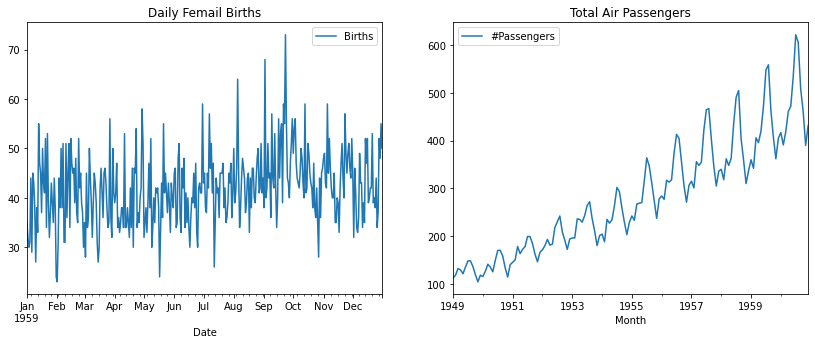

In [170]:
# Visual Check
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df1.plot(ax=ax[0])
df2.plot(ax=ax[1])
ax[0].set_title('Daily Femail Births')
ax[1].set_title('Total Air Passengers')
plt.show()

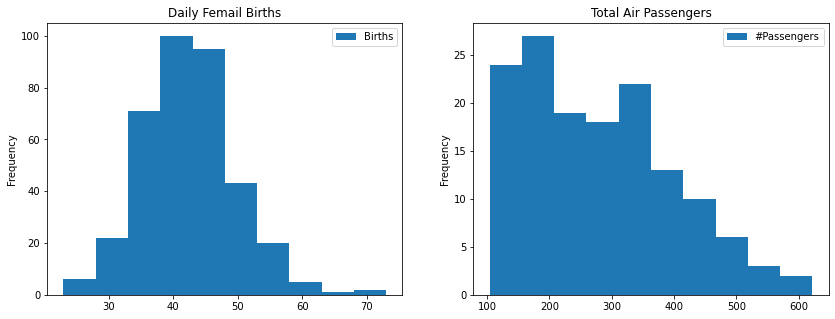

In [171]:
# Summary Statistics
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df1.plot(ax=ax[0], kind='hist')
df2.plot(ax=ax[1], kind='hist')
ax[0].set_title('Daily Femail Births')
ax[1].set_title('Total Air Passengers')
plt.show()

In [172]:
# Summary Statistics
X1 = df1.iloc[:len(df1)//2, 0]
X2 = df1.iloc[len(df1)//2:, 0]
print(f'For Female Birth Dataset, group 1 mean = {X1.mean():.2f}, group 2 mean = {X1.mean():.2f}, \ngroup 1 variance = {X1.var():.2f}, group 2 variance = {X2.var():.2f}')
print()
X3 = df2.iloc[:len(df2)//2, 0]
X4 = df2.iloc[len(df2)//2:, 0]
print(f'For Air Passenger Dataset, group 1 mean = {X3.mean():.2f}, group 2 mean = {X4.mean():.2f}, \ngroup 1 variance = {X3.var():.2f}, group 2 variance = {X4.var():.2f}')

For Female Birth Dataset, group 1 mean = 39.76, group 2 mean = 39.76, 
group 1 variance = 49.49, group 2 variance = 48.98

For Air Passenger Dataset, group 1 mean = 182.90, group 2 mean = 377.69, 
group 1 variance = 2275.69, group 2 variance = 7471.74


In [173]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

result1 = adfuller(df1)
result2 = adfuller(df2)
print('Female Birth Dataset p-value: %f' % result1[1])
print('Air Passenger Dataset p-value: %f' % result2[1])

Female Birth Dataset p-value: 0.000052
Air Passenger Dataset p-value: 0.991880


### task 3.2 Make time series stationary by Differencing

In [3]:
df = pd.read_csv('data/airpassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

Air Paseenger before differencing p-value: 0.991880
Air Paseenger after differencing p-value: 0.000000


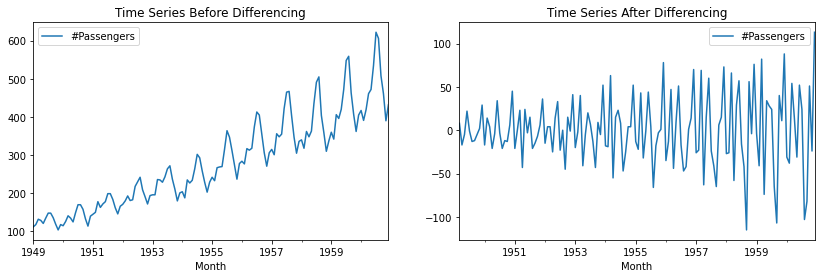

In [25]:
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller

df_diff = diff(df, k_diff=2)
result1 = adfuller(df)
result2 = adfuller(df_diff)

print('Air Paseenger before differencing p-value: %f' % result1[1])
print('Air Paseenger after differencing p-value: %f' % result2[1])

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df.plot(ax=ax[0])
df_diff.plot(ax=ax[1])
ax[0].set_title('Time Series Before Differencing')
ax[1].set_title('Time Series After Differencing')
plt.show()

### task 4.1 simple moving average

In [174]:
df = pd.read_csv('data/bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


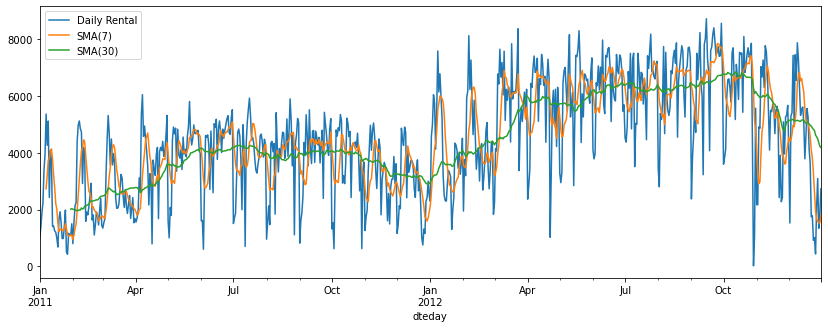

In [175]:
daily_rental = df.resample('D')[['cnt']].sum()
ax = daily_rental.plot(figsize=(14, 5))
daily_rental.rolling(window=7).mean().plot(ax=ax)
daily_rental.rolling(window=30).mean().plot(ax=ax)
ax.legend(labels=['Daily Rental', 'SMA(7)', 'SMA(30)'])
plt.show()

### task 4.2 Holt-Winters exponential smoothing model

In [176]:
df = pd.read_csv('data/bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [177]:
# group and calculate daily rental
daily_rental = df.resample('D')[['cnt']].sum()

# define training dataset
train_data = daily_rental[daily_rental.index<'2012-11']
test_data = daily_rental[daily_rental.index>='2012-11']

In [178]:
# define mean absolute percentage error function
def MAPE(y_actual, y_pred):
    y_actual = y_actual.values.reshape(-1,)
    y_pred = y_pred.values
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

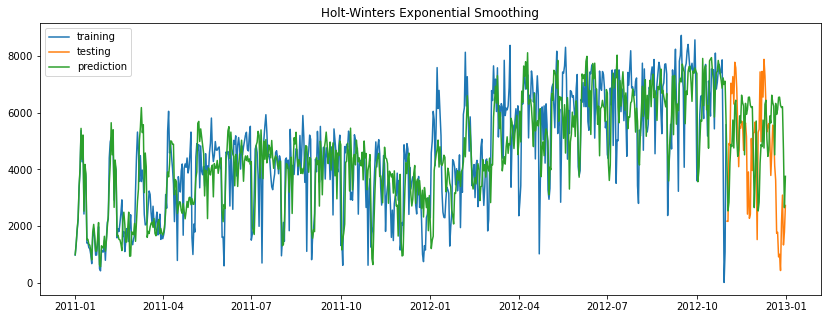

In [179]:
# Exponential Smoothing Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
es_model = HWES(train_data, seasonal_periods=31, trend='add', seasonal='add',
                damped_trend=True, freq='D').fit()
pred1 = es_model.predict(start='2011-01-01', end='2012-12-31')

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(pred1, label='prediction')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing')
plt.show()

In [180]:
mape_train = MAPE(train_data, pred1[pred1.index<'2012-11'])
mape_test = MAPE(test_data, pred1[pred1.index>='2012-11'])
print(f'Model Mean Absolute Percentage Error on training data is {mape_train:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test:.2f}%')

Model Mean Absolute Percentage Error on training data is 76.50%
Model Mean Absolute Percentage Error on testing data is 90.48%


### task 4.3 Auto-Arima

In [181]:
df = pd.read_csv('data/bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [182]:
# group and calculate daily rental
daily_rental = df.resample('D')[['cnt']].sum()

# define training dataset
train_data = daily_rental[daily_rental.index<'2012-11']
test_data = daily_rental[daily_rental.index>='2012-11']

In [183]:
# auto-arima model
from pmdarima.arima import auto_arima
arima_model = auto_arima(train_data, seasonal=True, m=31)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  670
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 31)   Log Likelihood               -5655.763
Date:                             Thu, 18 Mar 2021   AIC                          11323.526
Time:                                     12:21:08   BIC                          11350.561
Sample:                                          0   HQIC                         11333.998
                                             - 670                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1097      1.327      1.590      0.112      -0.491       4.710
ar.L1          0.4552      0.032     14.392      0.000       0.393       0.517
ma.L1         -0.9727      0.011    -92.514      0.000      -0.993      -0.952
ar.S.L31       0.2842      0.037      7.601      0.000       0.211       0.358
ar.S.L62       0.0922      0.041      2.270      0.023       0.013       0.172
sigma2       1.28e+06   5.21e+04     24.569      0.000    1.18e+06    1.38e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               243.12
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [184]:
pred_in_sample = arima_model.predict_in_sample()
pred_out_sample = arima_model.predict(n_periods=61)
pred_full = np.concatenate((pred_in_sample, pred_out_sample))

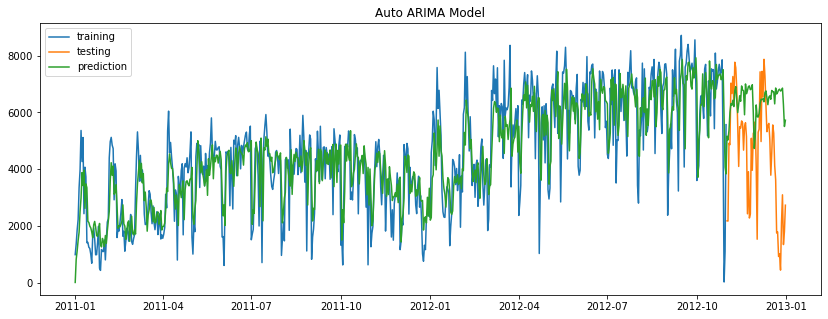

In [185]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(daily_rental.index, pred_full, label='prediction')
plt.legend()
plt.title('Auto ARIMA Model')
plt.show()

In [186]:
# define mean absolute percentage error function
def MAPE(y_actual, y_pred):
    y_actual = y_actual.values.reshape(-1,)
    y_pred = y_pred
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape_train = MAPE(train_data, pred_in_sample)
mape_test = MAPE(test_data, pred_out_sample)
print(f'Model Mean Absolute Percentage Error on training data is {mape_train:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test:.2f}%')

Model Mean Absolute Percentage Error on training data is 68.13%
Model Mean Absolute Percentage Error on testing data is 105.84%


### task 4.3 SARIMAX

In [187]:
df = pd.read_csv('data/bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [188]:
# group and calculate daily rental
daily_rental = df.resample('D')[['cnt']].sum()

# define training dataset
train_data = daily_rental[daily_rental.index<'2012-11']
test_data = daily_rental[daily_rental.index>='2012-11']

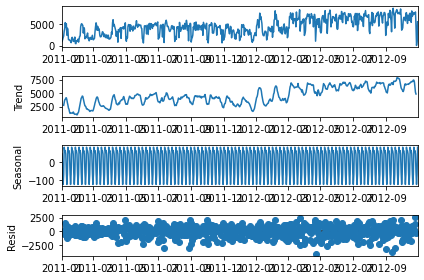

In [189]:
# seasonality breakdown
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_data, model='additive')
result.plot()
plt.show()

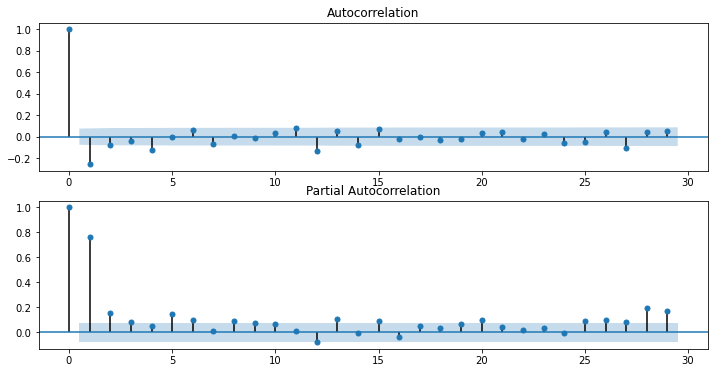

In [190]:
# plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(train_data.diff()[1:], ax=ax[0])
plot_pacf(train_data, ax=ax[1])
plt.show()

In [191]:
# SARIMAX modeel
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_model = SARIMAX(train_data, order=(2,1,1),
                      seasonal_order=(2,0,1,30)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                cnt   No. Observations:                  670
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 30)   Log Likelihood               -5677.278
Date:                            Thu, 18 Mar 2021   AIC                          11368.557
Time:                                    12:21:59   BIC                          11400.097
Sample:                                01-01-2011   HQIC                         11380.774
                                     - 10-31-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4273      0.034     12.579      0.000       0.361       0.494
ar.L2          0.0465      0.040      1.158      0.247      -0.032       0.125
ma.L1         -0.9657      0.012    -80.500      0.000      -0.989      -0.942
ar.S.L30       0.4769      0.405      1.178      0.239      -0.317       1.270
ar.S.L60       0.0306      0.096      0.319      0.750      -0.157       0.219
ma.S.L30      -0.3038      0.401     -0.757      0.449      -1.090       0.483
sigma2      1.369e+06   5.91e+04     23.160      0.000    1.25e+06    1.49e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               223.63
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

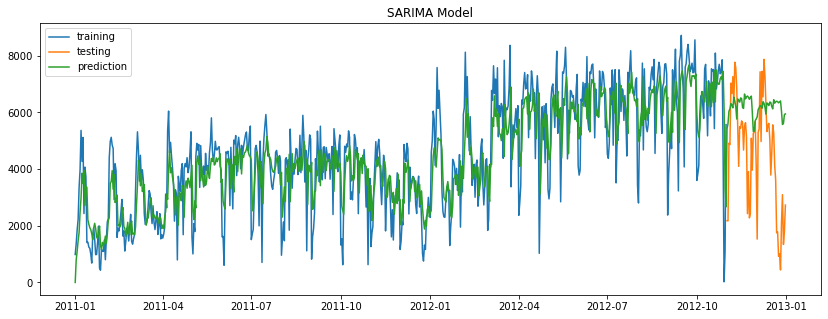

In [192]:
pred = arima_model.get_prediction(start='2011-01-01', end='2012-12-31').predicted_mean

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [193]:
# define mean absolute percentage error function
def MAPE(y_actual, y_pred):
    y_actual = y_actual.values.reshape(-1,)
    y_pred = y_pred.values
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape_train = MAPE(train_data, pred[pred.index<'2012-11'])
mape_test = MAPE(test_data, pred[pred.index>='2012-11'])
print(f'Model Mean Absolute Percentage Error on training data is {mape_train:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test:.2f}%')

Model Mean Absolute Percentage Error on training data is 70.57%
Model Mean Absolute Percentage Error on testing data is 99.24%


### task 4.4: SARIMAX with hyperparameter tuning

In [2]:
df = pd.read_csv('data/bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# group and calculate daily rental
daily_rental = df.resample('D')[['cnt']].sum()

# define training dataset
train_data = daily_rental[daily_rental.index<'2012-11']
test_data = daily_rental[daily_rental.index>='2012-11']

In [4]:
# define mean absolute percentage error function
def MAPE(y_actual, y_pred):
    y_actual = y_actual.values.reshape(-1,)
    y_pred = y_pred.values
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

In [5]:
orders = [(1,1,0), (0,1,1), (1,1,1), (2,1,0), (2,1,1)]
seasonal_orders = [(1,0,0,31), (1,0,1,31)]

In [6]:
# SARIMAX modeel with grid search parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX

prediction_df = pd.DataFrame()
metrics_df = pd.DataFrame(columns=['model', 'mape_train', 'mape_test', 'AIC'])

for order in orders:
    for seasonal_order in seasonal_orders:
        arima_model = SARIMAX(train_data, order=order,
                      seasonal_order=seasonal_order,
                      trend=[1,1,1]).fit()
        
        pred = arima_model.get_prediction(start='2011-01-01', end='2012-12-31').predicted_mean
        prediction_df[f'{order},{seasonal_order}'] = pred

        mape_train = round(MAPE(train_data, pred[pred.index<'2012-11']), 2)
        mape_test = round(MAPE(test_data, pred[pred.index>='2012-11']), 2)
        metrics_df = metrics_df.append({'model': f'{order},{seasonal_order}', 'mape_train': mape_train, 'mape_test': mape_test, 'AIC': arima_model.aic}, ignore_index=True)

C:\Users\Wilson\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [7]:
metrics_df = metrics_df.sort_values('mape_test')
metrics_df

,model,mape_train,mape_test,AIC
1,"(1, 1, 0),(1, 0, 1, 31)",65.24,50.31,11461.661064
0,"(1, 1, 0),(1, 0, 0, 31)",65.28,51.70,11461.085639
2,"(0, 1, 1),(1, 0, 0, 31)",65.52,53.26,11437.144412
6,"(2, 1, 0),(1, 0, 0, 31)",65.69,54.54,11437.738529
7,"(2, 1, 0),(1, 0, 1, 31)",66.15,62.67,11437.436522
9,"(2, 1, 1),(1, 0, 1, 31)",68.23,63.53,11375.723827
4,"(1, 1, 1),(1, 0, 0, 31)",64.65,71.25,11410.063908
8,"(2, 1, 1),(1, 0, 0, 31)",64.45,76.20,11408.079927
5,"(1, 1, 1),(1, 0, 1, 31)",68.41,78.96,11371.034545
3,"(0, 1, 1),(1, 0, 1, 31)",71.48,83.82,11418.228289


In [17]:
print('My Best Result:')
print(f"MAPE on training data: {metrics_df['mape_train'][0]}%")
print(f"MAPE on testing data: {metrics_df['mape_test'][0]}%")

My Best Result:
MAPE on training data: 65.28%
MAPE on testing data: 51.7%


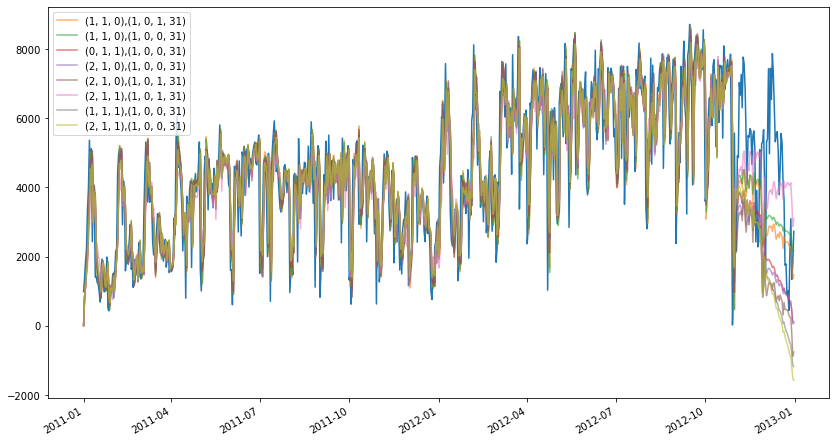

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(daily_rental, label='observation')
prediction_df[metrics_df['model'][:8]].plot(ax=ax, alpha=0.6)
plt.show()